In [ ]:
import os
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [ ]:
def get_tidyTweet(s):
    url_pattern = re.compile(r'https?://\S+')
    no_url = url_pattern.sub(r'', str(s))
    username_pattern = re.compile(r'@\w+')
    no_username = username_pattern.sub(r'', no_url)
    hashtag_pattern = re.compile(r'#\w+')
    no_hashtag = hashtag_pattern.sub(r'', no_username)
    return no_hashtag

def remove_punct(s):
    punct_pattern = re.compile(r'[^\w\s\']')
    no_punct = punct_pattern.sub(r'', str(s))
    return no_punct

def normalize_words(tokens):
    norm_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return norm_tokens

def remove_stopwords(tokens):
    result_tokens = []
    for t in tokens:
        if (t not in stopword and len(t) > 2 and not t.isnumeric()):
            result_tokens.append(t)
    return result_tokens

def words_preprocessing(tweet):
    tidy_tweet = get_tidyTweet(tweet).lower()
    tidy_tweet = remove_punct(tidy_tweet)
    tokens = tidy_tweet.split()
    norm_tokens = normalize_words(tokens)
    result_tokens = remove_stopwords(norm_tokens)
    return result_tokens

In [ ]:
path = 'data/'
files = os.listdir(path)
df = pd.concat([pd.read_csv(path+f) for f in files], ignore_index=True)
df = df.drop_duplicates()
df = df[df['language']=='en']
df = df.reset_index(drop=True)

In [ ]:
df_words = df['tweet'].apply(words_preprocessing)
df_words = df_words[df_words.str.len()!=0]
df_words = df_words.reset_index(drop=True)

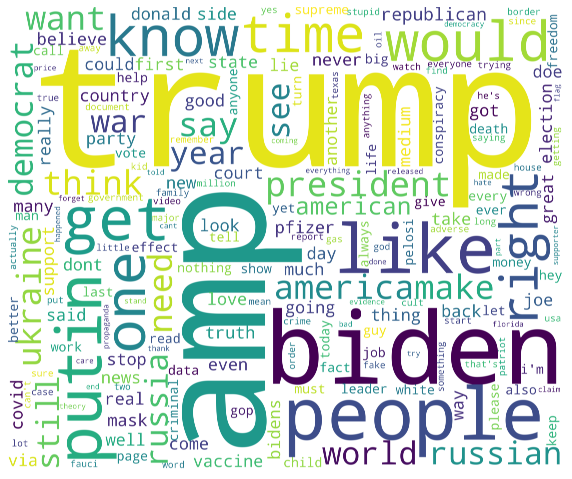

In [ ]:
word_list = list(df_words.explode())
nltk_count = nltk.FreqDist(word_list)
wordcloud = WordCloud(
    background_color='white',
    scale=20,
    height=500,
    width=600,
    ).generate_from_frequencies(nltk_count)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
frequency = {}
for k, v in nltk_count.most_common(100):
    frequency[k] = v/len(df)
print('Top 50 most frequent tokens in D1:')
print(frequency)

Top 50 most frequent tokens in D1:
{'trump': 0.12692184497117232, 'amp': 0.09929532351057015, 'biden': 0.06702434336963485, 'people': 0.0650624599615631, 'like': 0.057335041639974375, 'putin': 0.04876681614349776, 'get': 0.04432254964766175, 'one': 0.03939782190903267, 'know': 0.038637091607943624, 'would': 0.03751601537475977, 'time': 0.033512171684817425, 'right': 0.03323190262652146, 'president': 0.033071748878923765, 'say': 0.0321108263933376, 'ukraine': 0.032030749519538756, 'think': 0.03195067264573991, 'america': 0.03163036515054452, 'want': 0.030989750160153748, 'make': 0.030949711723254326, 'need': 0.03030909673286355, 'democrat': 0.029067905188981422, 'russian': 0.02742632927610506, 'russia': 0.027306213965406792, 'world': 0.026745675848814862, 'see': 0.026225176169122358, 'war': 0.02602498398462524, 'still': 0.025704676489429854, 'year': 0.025704676489429854, 'american': 0.025544522741832158, 'republican': 0.02486386931454196, 'back': 0.023542600896860985, 'never': 0.0228219

In [ ]:
df_freq = pd.DataFrame(nltk_count.most_common(20), columns=['word', 'count'])

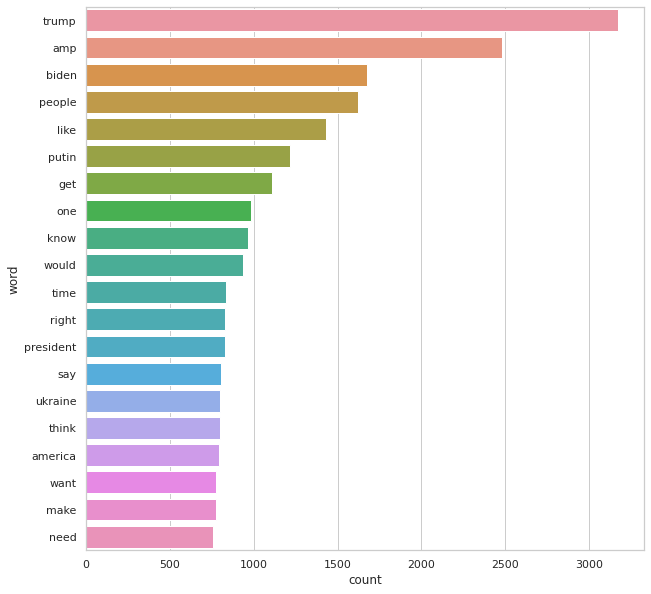

In [ ]:
plt.figure(figsize=(10, 10))
sns.set_theme(style='whitegrid')
sns.barplot(x='count', y='word', data=df_freq)
plt.show()

In [ ]:
def tweet_preprocessing(tweet):
    tidy_tweet = get_tidyTweet(tweet)
    clean_tweet = ' '.join(tidy_tweet.split())
    return tidy_tweet

In [ ]:
df_tweet = df['tweet'].apply(tweet_preprocessing)
df_tweet = df_tweet[df_tweet.str.len()>=0]
df_tweet = df_tweet.reset_index(drop=True)

In [ ]:
labeled_file = 'labeled_tweets.csv'
df_labeled = pd.read_csv(
    labeled_file,
    encoding = 'Latin-1',
    names=['label', 'id', 'date', 'flag', 'user', 'tweet'])
df_labeled.loc[(df_labeled['label']==4), 'label'] = 1
df_labeled['clean_tweet'] = df_labeled['tweet'].apply(tweet_preprocessing)
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_labeled, test_size=0.05)

print('TRAIN size:', len(df_train))
print('VAL size:', len(df_val))

TRAIN size: 1520000
VAL size: 80000
